In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-250s-in-imdb/imdb (1000 movies) in june 2022.csv
/kaggle/input/top-250s-in-imdb/imdb(MOVIES).csv
/kaggle/input/top-250s-in-imdb/imdb (1000 tv series) - (june 2022).csv
/kaggle/input/top-250s-in-imdb/imdb(VIDEO GAMES).csv
/kaggle/input/top-250s-in-imdb/imdb(SERIES).csv
/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
path = '../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv'
df = pd.read_csv(path)

In [67]:
print(f"Die Datei bestehen aus: {df.shape[0]} Zeile und {df.shape[1]} Spalte ")

Die Datei bestehen aus: 1000 Zeile und 16 Spalte 


In [68]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [69]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [70]:
df.rename(columns = {'Series_Title':'Film_Title',}, inplace = True) 
#Wir haben den Namen der Spalte geändert

In [71]:
df.head()

,Poster_Link,Film_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [72]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Film_Title     1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [74]:
#Gross Spalte soll numeric sein
df['Gross'] = df['Gross'].str.replace(',','')
df['Gross'] = df['Gross'].replace(np.nan, 0)
df['Gross'] = df['Gross'].astype(str).astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Film_Title     1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [76]:
df['Gross'].dtype

dtype('int64')

#  Korrelation

In [77]:
df.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


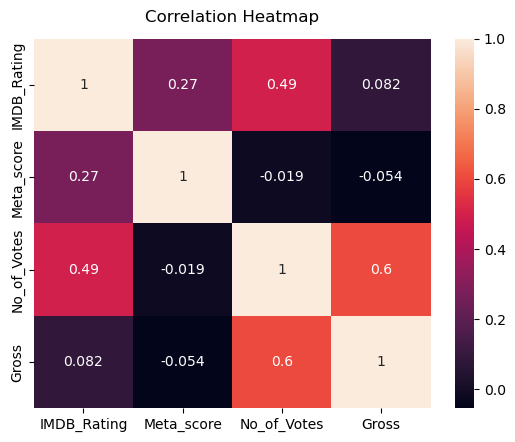

In [78]:
heatmap = sns.heatmap(df.corr(), annot=True);  #Es gibt keine Korrelation zwischen IMDB_Rating, Mate_Score und Gross
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Top voted movies

In [79]:
top_rated = df.groupby('Film_Title')['No_of_Votes'].sum()
top_rated = top_rated.sort_values(ascending=False).head(10) / 1000000
top_rated.round(2)

Film_Title
The Shawshank Redemption                             2.34
The Dark Knight                                      2.30
Inception                                            2.07
Fight Club                                           1.85
Pulp Fiction                                         1.83
Forrest Gump                                         1.81
The Matrix                                           1.68
The Lord of the Rings: The Fellowship of the Ring    1.66
The Lord of the Rings: The Return of the King        1.64
The Godfather                                        1.62
Name: No_of_Votes, dtype: float64

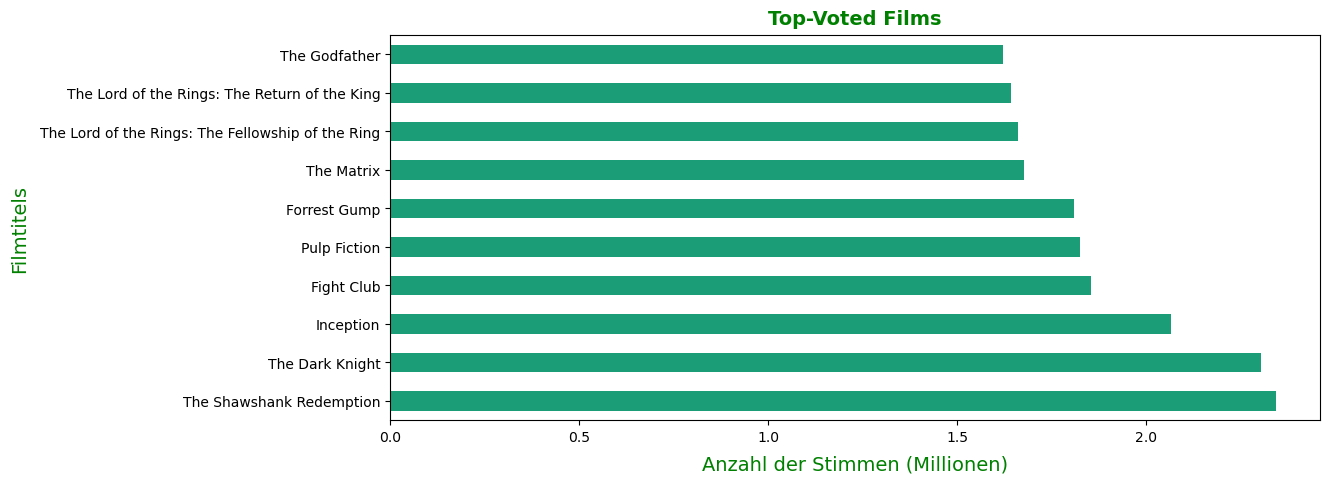

In [80]:
top_rated.plot(figsize=(12, 5), kind='barh', legend=False, colormap = 'Dark2')
plt.title('Top-Voted Films', weight = "bold", pad=8,
          fontdict = {'family':'cursive','color':'green','size':14})
plt.xlabel('Anzahl der Stimmen (Millionen)', color='Green', labelpad=8,
           fontdict = {'family':'fantasy','color':'green','size':14})
plt.ylabel('Filmtitels', color='green', labelpad=8, 
           fontdict = {'family':'fantasy','color':'green','size':14})

plt.show()



# Top Bewertete Films

In [81]:
top_rating = df.groupby('Film_Title')['IMDB_Rating'].mean() #IMDB Top bewertete Films
top_rating = top_rating.sort_values(ascending=False).head(10)
top_rating

Film_Title
The Shawshank Redemption                             9.3
The Godfather                                        9.2
The Dark Knight                                      9.0
The Godfather: Part II                               9.0
12 Angry Men                                         9.0
Pulp Fiction                                         8.9
Schindler's List                                     8.9
The Lord of the Rings: The Return of the King        8.9
The Lord of the Rings: The Fellowship of the Ring    8.8
Inception                                            8.8
Name: IMDB_Rating, dtype: float64

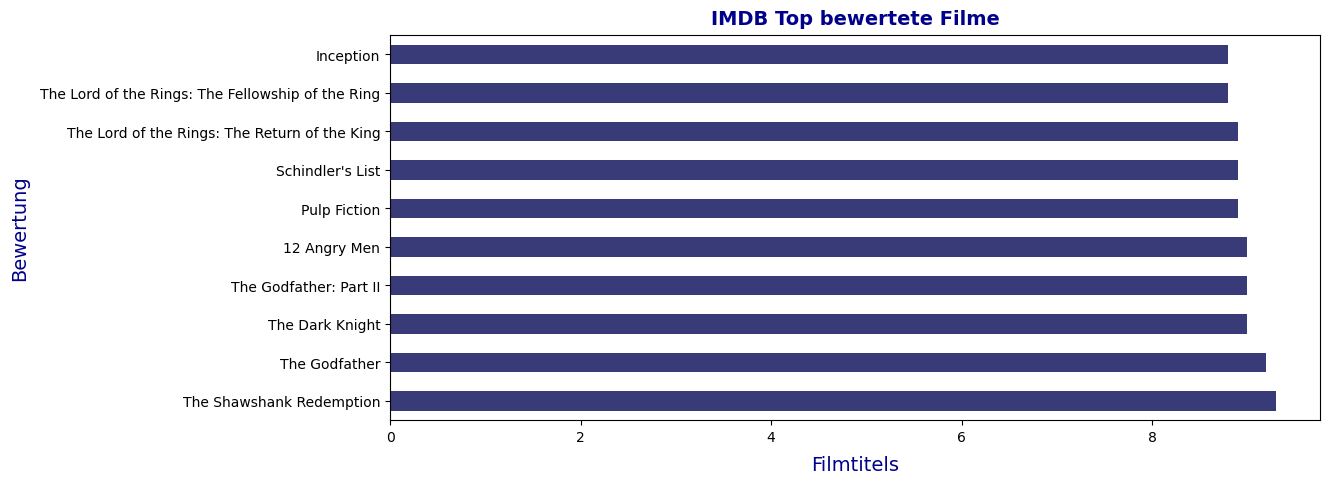

In [82]:
top_rating.plot(figsize=(12, 5), kind='barh', legend=False, colormap = 'tab20b')
plt.title('IMDB Top bewertete Filme', weight = "bold", pad=8,
          fontdict = {'family':'fantasy','color':'darkblue','size':14})
plt.xlabel('Filmtitels', labelpad=8,
           fontdict = {'family':'fantasy','color':'darkblue','size':14})
plt.ylabel('Bewertung', labelpad=8,
           fontdict = {'family':'fantasy','color':'darkblue','size':14})

plt.show()

In [83]:
top_rating = df.groupby('Film_Title')['Meta_score'].mean() #Meta Score Top bewertete Films
top_rating = top_rating.sort_values(ascending=False).head(20)
top_rating

Film_Title
Sweet Smell of Success              100.0
Lawrence of Arabia                  100.0
Notorious                           100.0
Casablanca                          100.0
Rear Window                         100.0
Fanny och Alexander                 100.0
Il conformista                      100.0
Vertigo                             100.0
Citizen Kane                        100.0
The Godfather                       100.0
Trois couleurs: Rouge               100.0
Boyhood                             100.0
Singin' in the Rain                  99.0
City Lights                          99.0
Touch of Evil                        99.0
The Night of the Hunter              99.0
Metropolis                           98.0
All About Eve                        98.0
The Treasure of the Sierra Madre     98.0
North by Northwest                   98.0
Name: Meta_score, dtype: float64

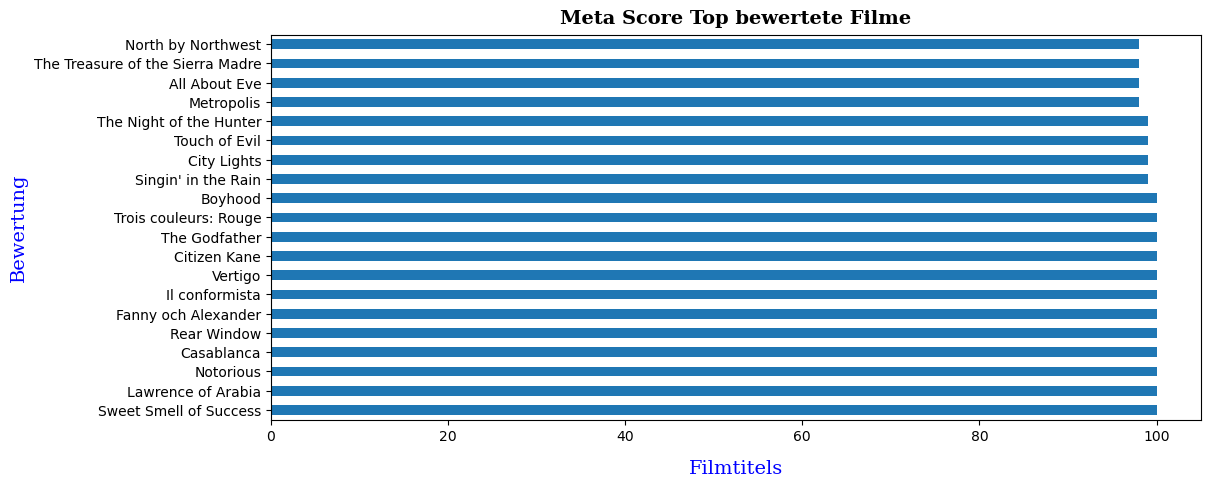

In [84]:
top_rating.plot(figsize=(12, 5), kind='barh', legend=False, colormap = 'tab20')
plt.title('Meta Score Top bewertete Filme', weight = "bold", pad=8,
          fontdict = {'family':'serif','color':'black','size':14})
plt.xlabel('Filmtitels', labelpad=12,
           fontdict = {'family':'serif','color':'blue','size':14})
plt.ylabel('Bewertung',
           fontdict = {'family':'serif','color':'blue','size':14})

plt.show()

# Brutto von den bestbewerteten Filmen

In [85]:
top_brutto = df.groupby('Film_Title')['Gross'].mean()
top_brutto = top_brutto.sort_values(ascending=False).head(10) /1000000
top_brutto.round(0)

Film_Title
Star Wars: Episode VII - The Force Awakens    937.0
Avengers: Endgame                             858.0
Avatar                                        761.0
Avengers: Infinity War                        679.0
Titanic                                       659.0
The Avengers                                  623.0
Incredibles 2                                 609.0
The Dark Knight                               535.0
Rogue One                                     532.0
The Dark Knight Rises                         448.0
Name: Gross, dtype: float64

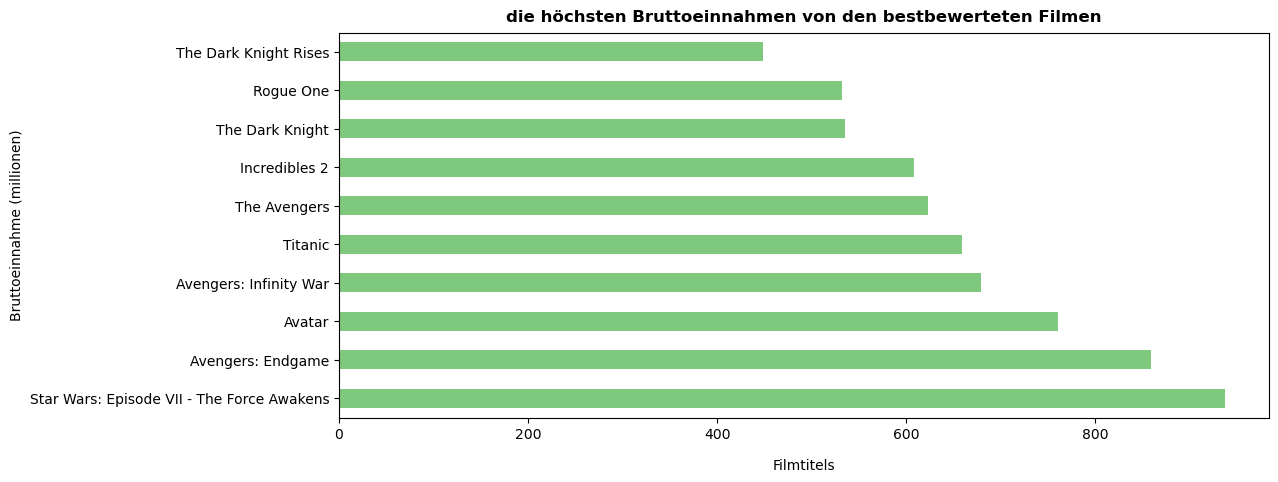

In [86]:
top_brutto.plot(figsize=(12, 5), kind='barh', legend=False, colormap = 'Accent')
plt.title('die höchsten Bruttoeinnahmen von den bestbewerteten Filmen', weight = "bold", pad=8 )
plt.xlabel('Filmtitels', labelpad=12)
plt.ylabel('Bruttoeinnahme (millionen)')

plt.show()

# der Zusammenhang zwischen IMDB Bewertungen und Bruttoeinkommen

Text(0, 0.5, 'Bruttoeinkomme')

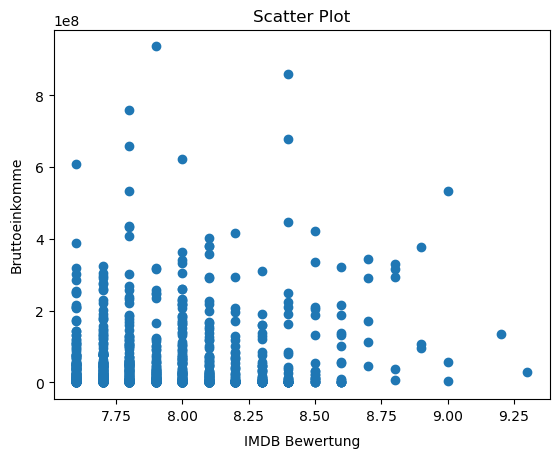

In [87]:
#der Zusammenhang zwischen IMDB Bewertungen und Bruttoeinkommen
plt.scatter(x='IMDB_Rating',y='Gross',data=df)
plt.title('Scatter Plot')
plt.xlabel('IMDB Bewertung', labelpad=8)
plt.ylabel('Bruttoeinkomme', labelpad=8)

# der Zusammenhang zwischen die Anzahl der Stimmen und Bruttoeinkommen

Text(0, 0.5, 'Bruttoeinkomme')

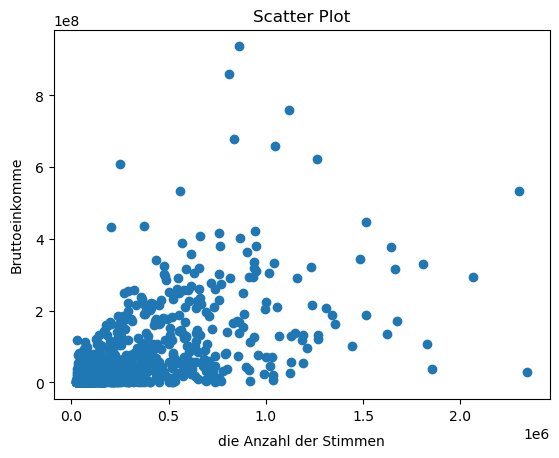

In [88]:
# der Zusammenhang zwischen der Anzahl der Stimmen und Bruttoeinkommen
plt.scatter(x='No_of_Votes',y='Gross',data=df)
plt.title('Scatter Plot')
plt.xlabel('die Anzahl der Stimmen', labelpad=8)
plt.ylabel('Bruttoeinkomme', labelpad=8)

<AxesSubplot:xlabel='No_of_Votes', ylabel='Gross'>

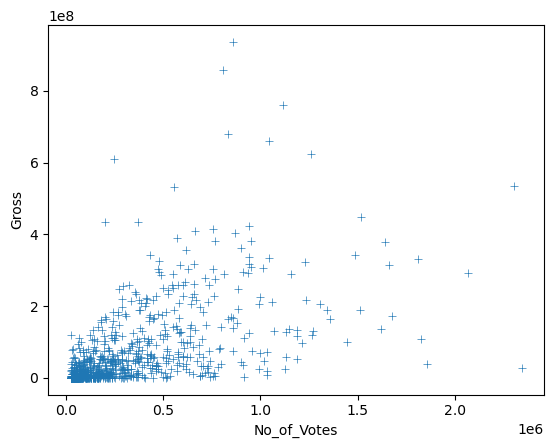

In [89]:
# der Zusammenhang zwischen IMDB Bewertungen und Bruttoeinkommen mit Seaborn per Certificate
sns.scatterplot(x='No_of_Votes',y='Gross',data=df,marker="+")

# Bewertung mit Histogram

(array([  6.,  40., 184., 363., 250.]),
 array([ 28. ,  42.4,  56.8,  71.2,  85.6, 100. ]),
 <BarContainer object of 5 artists>)

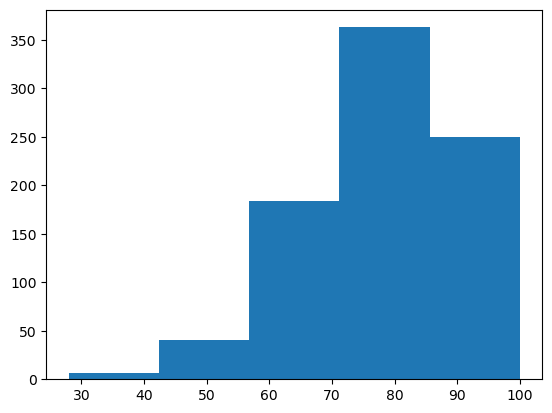

In [90]:
#Metascore mit Histogram
plt.hist(x='Meta_score',data=df,bins=5)

(array([537., 335., 110.,  13.,   5.]),
 array([7.6 , 7.94, 8.28, 8.62, 8.96, 9.3 ]),
 [<matplotlib.patches.Polygon at 0x7e11d9dd2c50>])

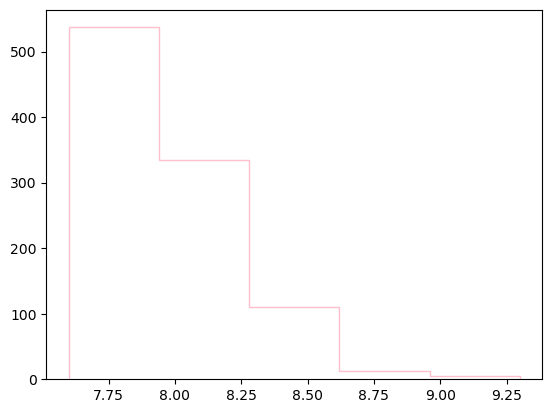

In [91]:
#IMDB Bewertung mit Histogram
plt.hist(x='IMDB_Rating',data=df,bins=5, color='pink', histtype='step')

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Count'>

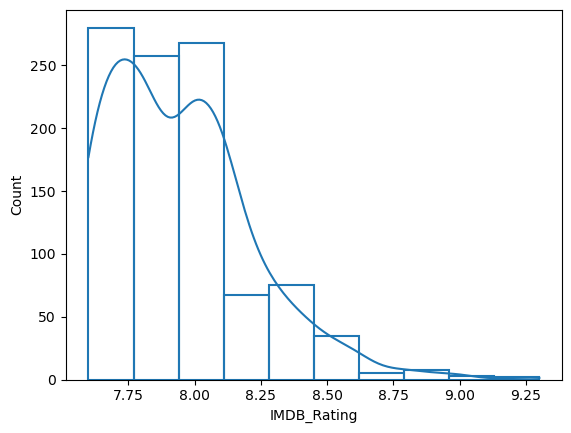

In [92]:
#IMDB Bewertung Histogram mit Seaborn
sns.histplot(data=df, x="IMDB_Rating",bins=10,kde=True, fill=False)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Count'>

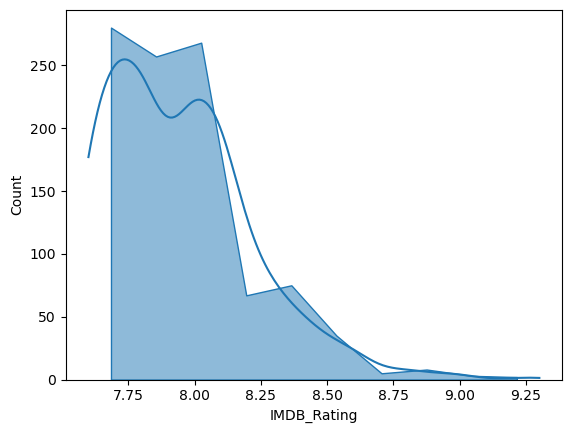

In [93]:
#IMDB Bewertung Histogram mit Seaborn
sns.histplot(data=df, x="IMDB_Rating",bins=10,kde=True, element="poly")

# die Verteilung nach Jahr

In [94]:
#ersetzen Sie 'PG' durch 0, um die Spalte in den Datentyp int zu konvertieren
df = df.replace('PG', 0, regex=True)
df['Released_Year'] = df['Released_Year'].astype(int)

In [95]:
#die Verteilung nach Jahr
Erscheinungsjahr = df['Released_Year']
Erscheinungsjahr 

film_2000 = []

for i in Erscheinungsjahr:
    if i >= 2000:
        film_2000.append(i)

film_2000 = pd.Series(film_2000)
a = float(film_2000.value_counts().sum())

film_1980 = []

for i in Erscheinungsjahr:
    if i >= 1980 and i < 2000:
        film_1980.append(i)

film_1980 = pd.Series(film_1980)
b = float(film_1980.value_counts().sum())

film_1960 = []

for i in Erscheinungsjahr:
    if i >= 1960 and i < 1980:
        film_1960.append(i)

film_1960 = pd.Series(film_1960)
c = float(film_1960.value_counts().sum())

film_1940 = []

for i in Erscheinungsjahr:
    if i >= 1940 and i < 1960:
        film_1940.append(i)

film_1940 = pd.Series(film_1940)
d = float(film_1940.value_counts().sum())

list_abc = [a, b, c, d]

([<matplotlib.patches.Wedge at 0x7e11da22fb90>,
 [Text(-0.010754191226932636, 1.0999474293669924, '2000-...'),
  Text(-0.7676123757852975, -0.7878903734284683, '1980-1999'),
  Text(0.5197215175478344, -0.9694790065791917, '1960-1979'),
  Text(1.0519817856575435, -0.3214565641649991, '1940-1959')],
 [Text(-0.0058659224874178005, 0.5999713251092685, '50.3%'),
  Text(-0.41869765951925314, -0.42975838550643725, '24.8%'),
  Text(0.2834844641170005, -0.5288067308613772, '15.5%'),
  Text(0.5738082467222965, -0.1753399440899995, '9.4%')])

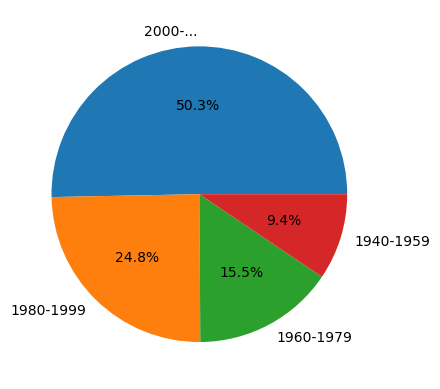

In [96]:
#die Verteilung nach Jahr mit Pie Diagramm
list_abc = pd.Series(list_abc)
plt.pie(list_abc, labels=['2000-...','1980-1999','1960-1979','1940-1959'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7e11da293490>,
 [Text(1.0999474293669924, 0.01075419122693219, '2000-...'),
  Text(-0.8595167710128748, 0.8373953190385062, '1980-1999'),
  Text(-0.9694790065791922, -0.5197215175478332, '1960-1979'),
  Text(-0.3214565641649993, -1.0519817856575435, '1940-1959')],
 [Text(0.5999713251092685, 0.005865922487417558, '50.3%'),
  Text(-0.5013847830908436, 0.48848060277246186, '24.8%'),
  Text(-0.5288067308613775, -0.28348446411699996, '15.5%'),
  Text(-0.17533994408999962, -0.5738082467222964, '9.4%')])

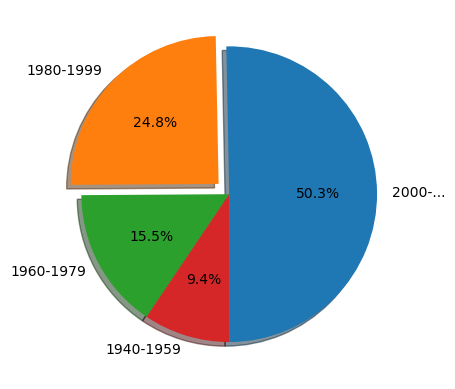

In [97]:
#1980-1999
explode = (0, 0.1, 0, 0)
plt.pie(list_abc, labels=['2000-...','1980-1999','1960-1979','1940-1959'], autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=270)